In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from pathlib import Path
import yaml
from data_utils.pcq_dataset_28features import smiles2graph_large, CustomPCQM4Mv2Dataset
from data_utils.load_dataset import CustomGraphData, load_raw_dataset
import os
from rdkit.Chem import AllChem, Draw

In [10]:
from argparser import parse_dict

In [11]:
# Choose model
model_name = "GPS_4layer"

# Set configs
model_dict = {"GPS_4layer": "GPS_PCQ_4gps_11M.yaml"}
cfg_path = Path("configs").joinpath(model_dict[model_name])
cfg_yaml = yaml.safe_load(cfg_path.read_text())
cfg = parse_dict(cfg_yaml)

# Set the checkpoint path for the corresponding config
sub_directory = model_dict[model_name].split(".")[0]
#checkpoint_path = Path(checkpoint_directory).joinpath(f"checkpoints/{sub_directory}/model-FINAL")

# Turn off dataset caching for this notebook
cfg.dataset.save_to_cache = False
cfg.dataset.load_from_cache = True
#cfg.dataset.cache_path = dataset_directory

In [15]:
cfg.dataset.dataset_name
os.environ["DATASET_DIR"] = "/tmp/ogb_lsc_pcqm4mv2/datasets/"
dataset_directory = os.environ.get("DATASET_DIR", ".")

'pcqm4mv2_conformers_28features'

In [5]:
smile_string = "CC(NCC[C@H]([C@@H]1CCC(=CC1)C)C)C"

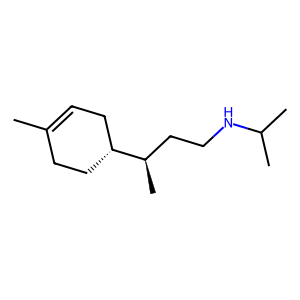

In [6]:
mol = Chem.MolFromSmiles(smile_string)
AllChem.Compute2DCoords(mol)
Draw.MolToImage(mol)

In [7]:
graph_obj = smiles2graph_large(smile_string)

In [8]:
graph_obj.keys()

dict_keys(['edge_index', 'edge_feat', 'node_feat', 'num_nodes'])

In [12]:
graphs = [graph_obj]
graph_raw = CustomGraphData(graphs,
                            use_extended_features=True,
                            use_conformers=True,
                            trim_chemical_features=cfg.dataset.trim_chemical_features,
                            use_periods_and_groups=cfg.dataset.use_periods_and_groups,
                            do_not_use_atomic_number=cfg.dataset.do_not_use_atomic_number,
                            chemical_node_features=cfg.dataset.chemical_node_features,
                            chemical_edge_features=cfg.dataset.chemical_edge_features)

NameError: name 'tf' is not defined